### Importing

In [177]:
from Bio import SeqIO
import numpy as np
import pylab
import matplotlib.pyplot as plt
from Bio import pairwise2
from Bio.Seq import Seq

import pandas as pd
%matplotlib inline
plt.ion()

import logomaker as lm

from Bio.pairwise2 import format_alignment

In [180]:
pip install logomaker

Note: you may need to restart the kernel to use updated packages.


### Importing Data (Fasta)

In [197]:
#cat_tyr_AA = SeqIO.read("P55033.fasta", "fasta")
#print(cat_tyr_AA)
#print(len(cat_tyr_AA))
#cat_tyr_seq_AA = cat_tyr_AA.seq
#print(cat_tyr_seq_AA)

#rab_tyr_AA = SeqIO.read("Q9MYI7.fasta", "fasta")
#print(rab_tyr_AA)
#print(len(rab_tyr_AA))
#rab_tyr_seq_AA = rab_tyr_AA.seq
#print(rab_tyr_seq_AA)

#hum_tyr_AA = SeqIO.read("P14679.fasta", "fasta")
#print(hum_tyr_AA)
#print(len(hum_tyr_AA))
#hum_tyr_seq_AA = hum_tyr_AA.seq
#print(hum_tyr_seq_AA)

#because the above is repetitive/the same for each sequence, a function was made below to keep code simple.

def get_fasta_seq(fasta_file):
    tyr_AA = SeqIO.read(fasta_file, "fasta")#reads in the fasta file
    print(tyr_AA)#prints fasta file
    print(len(tyr_AA))#prints length of fasta file
    seq_AA = tyr_AA.seq#collects sequence from fasta file
    print(seq_AA)#print sequence from fasta file
    return (tyr_AA, seq_AA)#need these variables for later, in brackets because more than one

(cat_tyr_AA, cat_tyr_seq_AA) = get_fasta_seq("P55033.fasta")#destructuring, variables line up in brackets respectively.
(rab_tyr_AA, rab_tyr_seq_AA) = get_fasta_seq("Q9MYI7.fasta")
(hum_tyr_AA, hum_tyr_seq_AA) = get_fasta_seq("P14679.fasta")

ID: sp|P55033|TYRO_FELCA
Name: sp|P55033|TYRO_FELCA
Description: sp|P55033|TYRO_FELCA Tyrosinase OS=Felis catus GN=TYR
Number of features: 0
Seq('MLLAALCCLLWSFRTSAGHFPRACASSKSLMEKECCPAWTGDSSPCGQLSGRGA...THV')
529
MLLAALCCLLWSFRTSAGHFPRACASSKSLMEKECCPAWTGDSSPCGQLSGRGACQDITLSKAPLGPQYPFTGMDDREAWPSVFYNRTCQCFGNFMGFNCGNCKFGFWGPNCTEKRLLVRRNIFDLSVPEKNKFLAYLTLAKHTISPDYVIPIGTYGQMNNGSTPMFNDINVYDLFVWMHYYVSRDTLLGGSEIWKDIDFAHEAPGFLPWHRLFLLLWEQEIQKLTGDENFTIPYWDWRDAKSCDICTDEYMGGHNPANPNLLSPASFFSSWQIICTRLEEYNSRQALCDGTPRGPLLRNPGHDKARTPRLPSSADVEFCLSLTQYESDSMDKAANFSFRNTLEGFASPLTGIADASQSSMHNALHIYMNGTMSQVQGSANDPIFLLHHAFVDSIFEQWLRRHHPLQEVYPEANAPIGHNRESYMVPFIPLYRNGDFFISSRDLGYDYSNLQDSERDIFQDYIKPFLEQASRIWPWLIGAAVVGSVLTAVLGRLTSLLCRRKRKQLREERQPLLMEKEDYHSLLYQTHV
ID: tr|Q9MYI7|Q9MYI7_RABIT
Name: tr|Q9MYI7|Q9MYI7_RABIT
Description: tr|Q9MYI7|Q9MYI7_RABIT Tyrosinase OS=Oryctolagus cuniculus GN=TYR
Number of features: 0
Seq('MRLTVLYCLMWSFWTSAGHFPRACTSSKNLVEKECCPPWNGDGSPCGQLSGRGS...SHL')
530
MRLTVLYCLMWSFWTSAGHFPRACTSSK

help for above pulled from: https://stackoverflow.com/questions/423710/how-to-return-more-than-one-value-from-a-function-in-python

### Pairwise Sequence Alignment

In [200]:
### first code, put into function below because basically same for each
#cat_rab_AA = int(pairwise2.align.globalxx(X, Y, score_only=True))
#print('Cat_Rab_Score:', cat_rab_AA)

#rab_hum_AA = int(pairwise2.align.globalxx(Y, Z,score_only=True))
#print('Rab_Hum_Score:', rab_hum_AA)

#cat_hum_AA = int(pairwise2.align.globalxx(X, Z, score_only=True))
#print('Cat_Hum_Score:', cat_hum_AA)

X=cat_tyr_seq_AA
Y=rab_tyr_seq_AA
Z=hum_tyr_seq_AA

def print_alignment_score(seq1, seq2, score_name):
    align_score = int(pairwise2.align.globalxx(seq1, seq2, score_only=True))
    print(score_name, 'Score:', align_score)

print_alignment_score(X, Y, 'Cat_Rab')
print_alignment_score(Y, Z, 'Rab_Hum')
print_alignment_score(X, Z, 'Cat_Hum')

Cat_Rab Score: 459
Rab_Hum Score: 474
Cat_Hum Score: 468


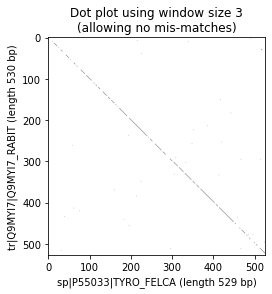

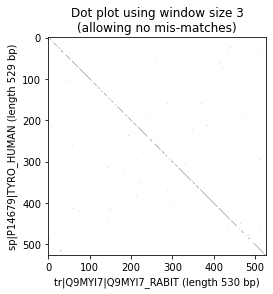

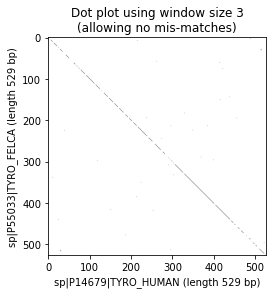

In [195]:
window = 3
seq_1 = str(X)
seq_2 = str(Y)
seq_3 = str(Z)
cat_rab_AA_data = [
    [
        (seq_1[i : i + window] != seq_2[j: j + window])
        for j in range(len(seq_1) - window)
    ]
    for i in range(len(seq_2) - window)
]

#print(cat_rab_data)

pylab.gray()
pylab.imshow(cat_rab_AA_data)
pylab.xlabel("%s (length %i bp)" % (cat_tyr_AA.id, len(cat_tyr_seq_AA)))
pylab.ylabel("%s (length %i bp)" % (rab_tyr_AA.id, len(rab_tyr_seq_AA)))
pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
pylab.show()

rab_hum_AA_data = [
    [
        (seq_2[i : i + window] != seq_3[j: j + window])
        for j in range(len(seq_2) - window)
    ]
    for i in range(len(seq_3) - window)
]

pylab.gray()
pylab.imshow(rab_hum_AA_data)
pylab.xlabel("%s (length %i bp)" % (rab_tyr_AA.id, len(rab_tyr_seq_AA)))
pylab.ylabel("%s (length %i bp)" % (hum_tyr_AA.id, len(hum_tyr_seq_AA)))
pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
pylab.show()

hum_cat_AA_data = [
    [
        (seq_3[i : i + window] != seq_1[j: j + window])
        for j in range(len(seq_3) - window)
    ]
    for i in range(len(seq_1) - window)
]

pylab.gray()
pylab.imshow(hum_cat_AA_data)
pylab.xlabel("%s (length %i bp)" % (hum_tyr_AA.id, len(hum_tyr_seq_AA)))
pylab.ylabel("%s (length %i bp)" % (cat_tyr_AA.id, len(cat_tyr_seq_AA)))
pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
pylab.show()

In [196]:
### Pairwise Sequence Alignment
X=cat_tyr_seq_AA
Y=rab_tyr_seq_AA
Z=hum_tyr_seq_AA

cat_rab_score = int(pairwise2.align.globalms(X, Y, 2, -1, -1, -.1, score_only=True))#added penalizations for gaps/extending gaps
print('Cat_Rab_Score:', cat_rab_score)

rab_hum_score = int(pairwise2.align.globalms(Y, Z, 2, -1, -1, -.1, score_only=True))
print('Rab_Hum_Score:', rab_hum_score)

cat_hum_score = int(pairwise2.align.globalms(X, Z, 2, -1, -1, -.1, score_only=True))
print('Cat_Hum_Score:', cat_hum_score)

#for a in pairwise2.align.globalxx(cat_tyr_seq_AA, rab_tyr_seq_AA):
    #print(format_alignment(*a)) #shows aligned parts of sequences starting at start position
    #print(format_alignment(*a, full_sequences=True)) #also shows unaligned parts
#for a in pairwise2.align.globalxx(rab_tyr_seq_AA, hum_tyr_seq_AA):
    #print(format_alignment(*a))
    #print(format_alignment(*a, full_sequences=True))
#for a in pairwise2.align.globalxx(cat_tyr_seq_AA, hum_tyr_seq_AA):
    #print(format_alignment(*a))
    #print(format_alignment(*a, full_sequences=True))

Cat_Rab_Score: 847
Rab_Hum_Score: 891
Cat_Hum_Score: 871


Source for for loop in pairwise 2 (above): https://biopython.org/docs/1.75/api/Bio.pairwise2.html

## Really wanted to try sequence logos

(250.0, 300.0)

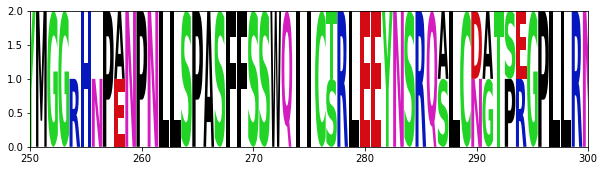

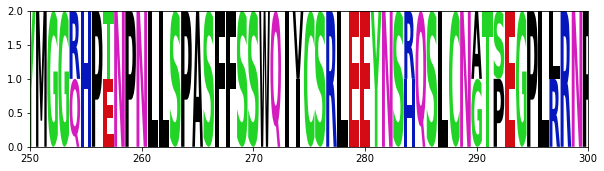

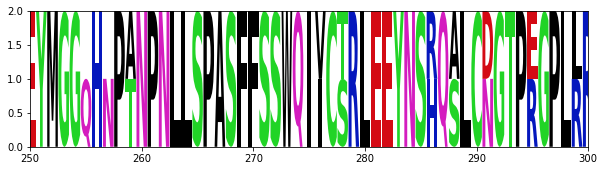

In [175]:
cat_rab_align = pairwise2.align.globalms(X, Y, 2, -1, -1, -.1)[0] #gap penalties added to get letters to stack
#print(format_alignment(*cat_rab_align)) this was used to for code check
#print(list(cat_rab_align[:2])) this was used for code check
cr_align = lm.alignment_to_matrix(sequences=list(cat_rab_align[:2]), to_type='counts')#2 because first 2 are seqs
cr_logo = lm.Logo(cr_align)
cr_logo.ax.set_xlim([250,300])#chose this area because lots of differences in sequences


rab_hum_align = pairwise2.align.globalms(Y, Z, 2, -1, -1, -.1)[0]
#print(format_alignment(*rab_hum_align)) this was used to for code check
#print(list(rab_hum_align[:2])) this was used for code check
rh_align = lm.alignment_to_matrix(sequences=list(rab_hum_align[:2]), to_type='counts')
rh_logo = lm.Logo(rh_align)
rh_logo.ax.set_xlim([250,300])

cat_hum_align = pairwise2.align.globalms(X, Z, 2, -1, -1, -.1)[0]
#print(format_alignment(*cat_hum_align)) this was used to for code check
#print(list(cat_hum_align[:2])) this was used for code check
ch_align = lm.alignment_to_matrix(sequences=list(cat_hum_align[:2]), to_type='counts')
#print(ch_align.head()) code check, making sure matrices were made correctly.
ch_logo = lm.Logo(ch_align)
ch_logo.ax.set_xlim([250,300])

### Swiss Model

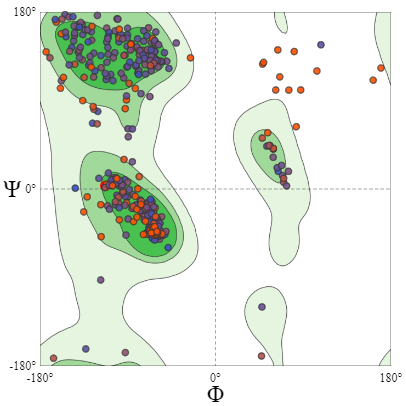
Rabbit_Cat Model

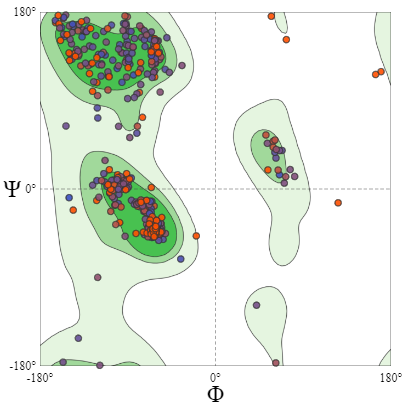
Rabbit_Human Model

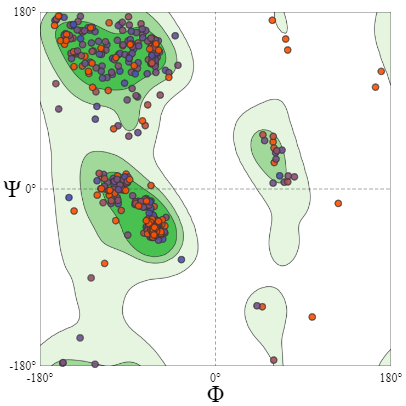
Cat_Human Model

### PyMOL